In [1]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [2]:
from bingo import *
from graph import *
from counting import *
from latex import *
from parallel import *

In [3]:
RUNS = 5_000_000
DECKS=[1,2,3,4,5,10,15,20,25,30,35,40]
palette = colorblind_palette(len(DECKS))

In [4]:
np.random.seed(56734)

In [5]:
DECKS=[1,2,3,4,5,10,15,20,25,30,35,40]
palette = colorblind_palette(len(DECKS))

In [6]:
%%time

df_jokers_3 = quick_deck_matches_on(RUNS, accept_jokers=True, early_stop=3, decks=DECKS)
df_jokers_3.head()

CPU times: user 263 ms, sys: 649 ms, total: 912 ms
Wall time: 4min 45s


,Deck count,Results,Successes,N,Probability
0,1,0 0 1 -1 2 -1 3 ...,798371,5000000,15.96742
1,2,0 2 1 -1 2 2 3 ...,1467759,5000000,29.35518
2,3,0 0 1 0 2 2 3 ...,2030469,5000000,40.60938
3,4,0 0 1 -1 2 -1 3 ...,2504098,5000000,50.08196
4,5,0 0 1 -1 2 0 3 ...,2902885,5000000,58.05770


In [7]:
with_red = palette[0].copy()
with_red[8] = (palette[1])

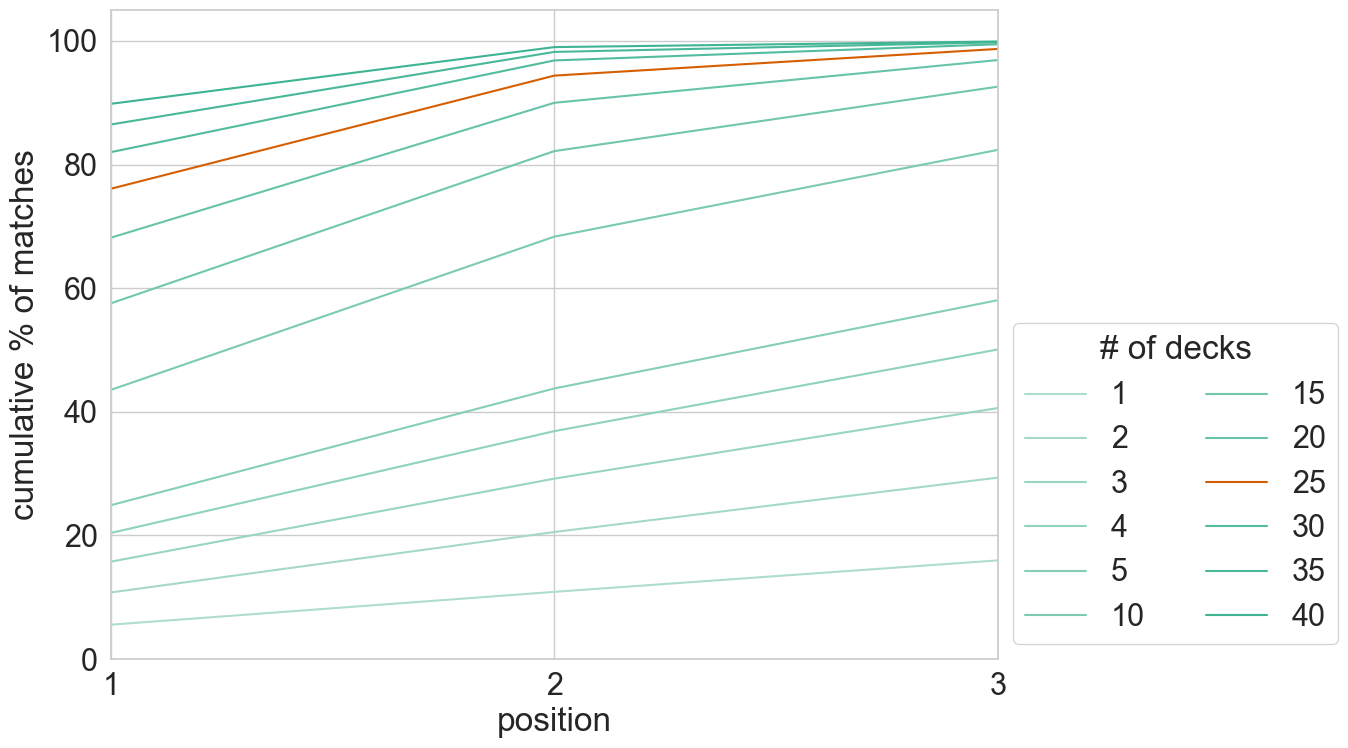

In [8]:
ax, data_3 = print_cumulative(df_jokers_3, True, xticks=[1, 2, 3], palette=with_red, figsize=(14, 8))

ax.get_lines()[8].set_color(palette[1])

plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=2, title="# of decks")
plt.xlim(1, 3)
plt.ylim(0, 105)
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")
plt.tight_layout()

plt.savefig(f"images/fig-the-naturally-ocurring-bingo-miracle3.png", bbox_inches='tight')
plt.show()

In [9]:
for i, (decks, card, values) in data_3.query("card==3").iterrows():
  print(decks, values, confidence(values * RUNS / 100, RUNS))

1.0 15.967419999999999 (0.15935338220689318, 0.1599955407509423)
2.0 29.35518 (0.29315279268256816, 0.29395112455375)
3.0 40.60938 (0.40566340202391404, 0.40652434227599815)
4.0 50.081959999999995 (0.5003813308038703, 0.5012578679367004)
5.0 58.0577 (0.5801443974283123, 0.5810094787539416)
10.0 82.36913999999999 (0.8233571177917168, 0.8240251848115121)
15.0 92.5993 (0.925763210267406, 0.9262221351352132)
20.0 96.90262 (0.9688739818290139, 0.9691776974471198)
25.0 98.70128000000001 (0.9869131843583268, 0.9871116672788994)
30.0 99.4601 (0.9945363867804922, 0.994664853196411)
35.0 99.76958 (0.997653388709431, 0.9977374465118825)
40.0 99.9034 (0.9990063837604404, 0.9990608494045429)


In [10]:
prob_table_to_latex(partial_card_to_prob(data_3.query("card==1"), RUNS), name="the-naturally-ocurring-bingo-miracle1")

\begin{table}[tb]
\label{tbl:the-naturally-ocurring-bingo-miracle1}
\begin{tabular}{llll}
\toprule
 & Probability & CI lower & CI upper \\
Decks &  &  &  \\
\midrule
1 & 5.565% & 5.545% & 5.585% \\
2 & 10.782% & 10.755% & 10.809% \\
3 & 15.764% & 15.732% & 15.796% \\
4 & 20.403% & 20.368% & 20.439% \\
5 & 24.896% & 24.858% & 24.934% \\
10 & 43.550% & 43.507% & 43.593% \\
15 & 57.552% & 57.509% & 57.595% \\
20 & 68.167% & 68.127% & 68.208% \\
25 & 76.083% & 76.046% & 76.121% \\
30 & 82.005% & 81.971% & 82.038% \\
35 & 86.481% & 86.451% & 86.511% \\
40 & 89.824% & 89.797% & 89.850% \\
\bottomrule
\end{tabular}
\end{table}



In [11]:
prob_table_to_latex(partial_card_to_prob(data_3.query("card==3"), RUNS), name="the-naturally-ocurring-bingo-miracle3")

\begin{table}[tb]
\label{tbl:the-naturally-ocurring-bingo-miracle3}
\begin{tabular}{llll}
\toprule
 & Probability & CI lower & CI upper \\
Decks &  &  &  \\
\midrule
1 & 15.967% & 15.935% & 16.000% \\
2 & 29.355% & 29.315% & 29.395% \\
3 & 40.609% & 40.566% & 40.652% \\
4 & 50.082% & 50.038% & 50.126% \\
5 & 58.058% & 58.014% & 58.101% \\
10 & 82.369% & 82.336% & 82.403% \\
15 & 92.599% & 92.576% & 92.622% \\
20 & 96.903% & 96.887% & 96.918% \\
25 & 98.701% & 98.691% & 98.711% \\
30 & 99.460% & 99.454% & 99.466% \\
35 & 99.770% & 99.765% & 99.774% \\
40 & 99.903% & 99.901% & 99.906% \\
\bottomrule
\end{tabular}
\end{table}

